## Preliminary operations

We will use [PyTorch](https://pytorch.org/) for our experiments. This package is already installed if you are using [Google colab](https://colab.research.google.com), a notebook-like system for running jupyter notebooks on virtual machines provisioned for free on the cloud. This has several advantages, and specifically allows us to use a GPU, though with some time limitations, and it requires an active Google account. In the rest of the notebook, it is expected that running is done on colab, although everything should execute smoothly also in other environments, provided that all packages have been installed (you can download a `requirements.txt.` file from the course Web site in order to automatically perform this installation on a local machine via `pip`). However, be aware that running this code on a machine not equipped with a GPU is likely to require a huge time in order to complete.

Let's check that the virtual machine we are using comes with a GPU: if you have opened this notebook in colab, look in the upper-right part of the browser content, right below your google avatar: if you see this

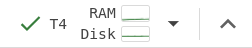

you are good to go: your machine has a GPU. In all other cases, use the *Runtime/Change runtime type* menu item and select any available runtime featuring a GPU. If none is made available to you, this means that you have exceeded the time limits allowed for the free use of colab. Otherwise, you should now see the above shown graphics in the upper-right part of your screen.

As a first operation, let's import the pyTorch library and use it to double-check the GPU availability.

In [45]:
import time

import matplotlib.pyplot as plt
import numpy as np
import torch

print(f'pytorch version: {torch.__version__}')

num_gpu = torch.cuda.device_count()
print(f'{num_gpu} GPU available')

pytorch version: 2.2.1+cu121
1 GPU available


Indeed, we have a GPU. Note that the pytorch version is made up of two elements, separated by a «plus» symbol: on the left, you find the version of the software, while on the right there is the CUDA version (CUDA is the name of the API framework used by the GPU). If you want to find out some more detail about the GPU, you can run the following cell (note that the exclamation mark implies that the cell is executed as a bash command).

In [46]:
!nvidia-smi

Fri Mar 29 15:04:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Exercise

Find the model name and the total available memory of the allocated GPU. What can you read in the lowest part of the output of the shell command `nvidia-smi`?

We'll need to install some packages which are not automatically provided in colab.

In [47]:
!pip install -q sacremoses bertviz datasets

When writing software which is supposed to run on a GPU, a best practice is that of providing a fallback in case the GPU itself is not available. This is done in pyTorch by the first line in the following code snippet.

In [48]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


From now on, we can use the `device` variable to transparently refer to the computational engine, which will be our GPU, unless someone else took control of it (by the way, that this will not happen if you are using colab).

Scaffolding is not over. In order to (greatly) simplifying your task, you can refer to [HuggingFace](https://huggingface.co/): a hub containing datasets and pretrained models for deep learning, including transformers. Sign up, login, and click on the _Settings_ link on the left of the page. Select the _Access Tokens_ section and create a new token, with READ privileges. Copy the token, get back to colab and click on the key in the left part of the screen (in the following figure, you see this key colored in orange).

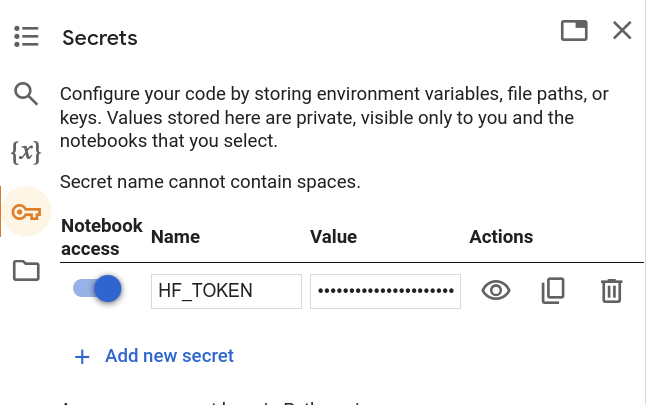

Click on _Add new secret_, select _Notebook access_, name the token `HF_TOKEN`, and paste the copied token in the _Value_ field. This enables you to download pre-trained models from HuggingFace using the `pipeline` function. For instance, we can retrieve a transformer automatically translating English to Spanish. __Note__: if you run the following cell within Google colab, you will be asked to grant the notebook the access to the `HF_TOKEN` you have previously created.

The use of a secret is done in this case to let this notebook be shared, for instance, on github without the need of disclosing the access token. Take-home message: **do not** share your access tokens with others.

We are now equipped with all that we need to run the rest of this notebook. The following cell downloads a model from HuggingFace: this model has been pre-trained to translate from English to Spanish.

In [49]:
from transformers import pipeline

model_name = 'Helsinki-NLP/opus-mt-en-es'
translator = pipeline('translation_en_to_es', model=model_name)

It will take a couple of minutes in order to download the model, as well as some associated files, as documented by some progress bars. In the meanwhile, go to the [HuggingFace](https://huggingface.co) web site, click on the _Models_ link, and search for the `Helsinki-NLP/opus-mt-en-es` model (be careful to use the model search box, rather than the task search box). Have a look on the model web page and try to directly use it (have a look at the Inference API box).

Get back to the notebook, likely the model is now available and we can translate directly within our notebook.

In [50]:
sentence = 'It\'s my day off and I only want to get to the beach and enjoy the sun, the sea, and the sand.'
translator(sentence)

[{'translation_text': 'Es mi día libre y sólo quiero llegar a la playa y disfrutar del sol, el mar y la arena.'}]

 **Note** While solving the following exercises, be careful to not modify the contents of the `translator` variable, as we will use it in the rest of the notebook.

### Exercise

Try to translate some other sentences from English to Spanish.

In [51]:
sentence = 'I am working now'
translator(sentence)

[{'translation_text': 'Estoy trabajando ahora.'}]

### Exercise

Go back to the HuggingFace web site and search for another model pretrained for translation, possibly from/to your mother tongue. Use it to translate some sentences (within your notebook) and check the quality of the results.

In [52]:
from transformers import pipeline

model_name = 'Helsinki-NLP/opus-mt-en-fr'
translator = pipeline('translation_en_to_fr', model=model_name)


In [53]:
sentence = 'Hello my dear friend'
translator(sentence)

[{'translation_text': 'Bonjour, mon cher ami.'}]

### Exercise

Read the [HuggingFace API documentation of `pipeline`](https://huggingface.co/docs/transformers/main_classes/pipelines) and play a bit with this function. Provide some relevant examples of its use, highlighting the flexibility of the function in automating the solutions of several problems.

Accessing the `model` field of the object saved in `transformer` you get a textual description of the transformer used for the translation task.

In [54]:
transformer = translator.model
transformer

MarianMTModel(
  (model): MarianModel(
    (shared): Embedding(59514, 512, padding_idx=59513)
    (encoder): MarianEncoder(
      (embed_tokens): Embedding(59514, 512, padding_idx=59513)
      (embed_positions): MarianSinusoidalPositionalEmbedding(512, 512)
      (layers): ModuleList(
        (0-5): 6 x MarianEncoderLayer(
          (self_attn): MarianAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation_fn): SiLU()
          (fc1): Linear(in_features=512, out_features=2048, bias=True)
          (fc2): Linear(in_features=2048, out_features=512, bias=True)
          (final_layer_norm): LayerNorm((512,), eps=1e-05

In [55]:
pipe = pipeline("text-classification")

pipe("This restaurant is awesome")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998743534088135}]

### Exercise

Compare the obtained output with what you have learnt during the previous lecture: which, among the three transformers kinds, was used here? Try to recognize each layer of the transformer, comparing it with the components introduced in the lecture. Can you spot some differences? If you notice that some numbers occur frequently in the model description, can you hypothesize their meaning?

59514 correspond au nombre de mots dans le dictionnaire 512 est la taille maximale de la phrase

### Exercise

Inspect the contents of the `translator` variable, via the `__dict__` field. What are their likely roles?

The lecture assumed that the text in input to a transformer was directly passed to an embedding. By reading the above mentioned documentation of `pipeline`, you should know that `translator` is made up by two major components: a tokenizer (partitioning an input string in suitable entities, called tokens) and a model (taking these tokens as input and outputting a prediction).

Tokenizers are a special class of models, and they are hosted, too, in HuggingFace. The `Autotokenizer` class is a helper that allows to automatically retrieve the tokenizer from a trained model.

In [18]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer

MarianTokenizer(name_or_path='Helsinki-NLP/opus-mt-en-fr', vocab_size=59514, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	59513: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

### Exercise

Use the retrieved tokenizer as a function in order to transform the sentence we have translated into a sequence of tokens. What data type is used to encode a token? Why is this a suitable option? Subsequently, use the `convert_ids_to_tokens` and the `convert_tokens_to_string` methods of the tokenizer in order to transform each obtained token in its equivalent textual form, and to obtain back the original string representation of the input. There is an important difference from what you get as results and the original input: in what does this difference consist? What you think is the purpose of this difference?

In [42]:
id='House'

token=tokenizer.convert_tokens_to_ids(id)
seq=tokenizer.convert_ids_to_tokens(token)
print(token)
print(seq)

44186
House


### Exercise

Print the value of the `vocab_size` and `model_max_length` instance variables of `tokenizer`: what do these values describe?

When you are done with a pre-trained translator (or any other model), you may want to clear your memory and make room for other models. Whenever this is needed, you can delete the variables you do not need anymore (using the `del` statement) and run the following function:

In [43]:
import gc

def clear_memory():
  gc.collect()
  torch.cuda.empty_cache()

Note that you **first** need to delete the variables and then clear the memory.

In [44]:
del translator
del transformer
clear_memory()

NameError: name 'translator' is not defined

You can also delete the models from your disk if you do not need them anymore. The easiest way is to delete the whole HuggingFace cache folder.

In [21]:
from transformers import file_utils

huggingface_cache_path = file_utils.default_cache_path
print(huggingface_cache_path)

# Uncomment the next line if you want to delete your cache folder.
# WARNING: this operation is irreversible! You will need to re-download all your models.
#!rm -r huggingface_cache_path

/root/.cache/huggingface/hub


If you want to delete specific models, you can refer to this [guide](https://huggingface.co/docs/huggingface_hub/v0.20.3/guides/manage-cache#clean-cache-from-the-terminal).

Let's consider now the self-attention mechanism. The following code exploits a special functionality of the `bertviz` package which graphically depicts the self-attention scores within a sentence input to a BERT model (note that this model has a different neural architecture than the one we are studying today, albeit it computes self-attention scores exactly in the same way). Click on the word «enjoy» to reveal the corresponding self-attention scores in the right part of the picture (the higher the blue shade, the higher the scores), and check which words do «enjoy» attends to. You can also click on the plus sign in order to enhance the visualization, also showing the key, query, and value matrices.

In [ ]:
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show

bert_model_name = 'bert-base-uncased'
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
bert_model = BertModel.from_pretrained(bert_model_name)
text = 'I want to enjoy the sun, the sea, and the sand'
show(bert_model, 'bert', bert_tokenizer, text, display_mode='light', layer=0, head=8)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

100%|██████████| 440473133/440473133 [00:12<00:00, 34289412.43B/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Exercise

Consider the sentence «Today, I will eat a salad with an apple, raisins, and lettuce», and check the difference in the attention scores computed for the for word «apple». Repeat the process for the sentence «Apple released today new models for its computer and smartphones», considering again the word «apple». Comment shortly the obtained results.

We now focus on a full implementation of the encoder-decoder-based transformer, starting by the computation of scaled dot attention. Recall that, given the so-called query, key, and value matrices (which we can denote as $Q$, $K$, and $V$), the output of an attention module is the following matrix:

$$
\mathrm{softmax} \left( \frac{Q \cdot K^\top}{\sqrt{d}} \right) \cdot V
$$

### Exercise

The following cell contains a skeleton for the implementation of a possible `scalded_dot_prod_attention` function computing the above-mentioned matrix. Fill in the blanks, replacing the `<FILL_ME>` occurrences.

**Notes**
- You can use the `bmm`, or `matmul` function in the `torch` module (the first one is more efficient when running on a GPU, could you say why?).
- Transposition is directly supported in the `Tensor` class: you can refer to the official documentation for the details.
- The softmax computation is supported by the `torch.nn.functional` module, but it is necessary to be careful in its computation: inputs to the various functions we will implement will contain _batches_, that is several arguments to be handled possibly in parallel, and a function should be mapped to all of them. You can refer to the `dim` argument for this.
- For now, ignore the part on the use of mask: we will focus on it in a while.

In [ ]:
from math import sqrt

import torch.nn.functional as F

def scaled_dot_prod_attention(query, key, value, mask=None):
    dim_k = <FILL_ME>
    scores = <FILL_ME> / sqrt(dim_k)

    # we'll see later on the use of masks
    if mask is not None:
        scores = scores.masked_fill(mask==0, -float('inf'))

    weights = <FILL_ME>

    return <FILL_ME>

You can use the next function to test if your implementation is correct.

In [ ]:
def test_scaled_dot_prod_att():
  torch.manual_seed(0)
  Q = torch.randint(-10,10,size=(4,1,3)).float()
  K = torch.randint(-10,10,size=(4,2,3)).float()
  V = torch.randint(-10,10,size=(4,2,1)).float()
  res = scaled_dot_prod_attention(Q,K,V)
  res = torch.round(res)
  ground_truth = torch.tensor([[[-8]],[[-2]],[[8]],[[6]]])
  assert((res == ground_truth).all())
  print('It works!')

In [ ]:
test_scaled_dot_prod_att()

It works!


In order to simplify the remaining implementations, we will rely on a specific programming pattern. Each model from HuggingFace is associated to a `Config` objects, which is basically a dictionary assembling relevant information to be shared across all components of a model. We will use such an object in order to avoid the proliferation of arguments to the constructors of the classes we will implement. Rather than building a `Config` object, we will borrow that associated to the translator model we used in the beginning of this laboratory. We can do that easily starting from the `Autoconfig` class, whose usage is analogous to that of `AutoTokenizer`. Once obtained the `Config` object, we add it a `'device'` key associated to the computational device we are using (likely, the GPU).

In [ ]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained(model_name)

# we add the current device to the config
config.__dict__['device'] = str(device)

### Exercise

Show the contents of the `config` variable, and find out at least four of its different components that you can associate to something which was described during the lecture on transformers.

The following cell contains an implementation of the `Embeddings` class, whose objects are in charge of text embeddings and positional encoding. Note that the latter are implemented without using the goniometric-based functions, as explained in the lecture. Rather, the encoding is _learnt_ via the `nn.Embedding` class, which is also used to learn the token embedding during the overall training.

In [ ]:
from torch import nn

class Embeddings(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.token_embeddings = nn.Embedding(config.vocab_size,
                                             config.hidden_size)
        self.position_embeddings = nn.Embedding(config.max_position_embeddings,
                                                config.hidden_size)
        self.layer_norm = nn.LayerNorm(config.hidden_size, eps=1E-12)
        self.dropout = nn.Dropout()
        self.device = config.device
        self.to(config.device)

    def forward(self, input_ids):
        seq_length = input_ids.size(1)
        position_ids = (torch.arange(seq_length, dtype=torch.long)
                             .unsqueeze(0)
                             .to(self.device))
        token_embeddings = self.token_embeddings(input_ids)
        position_embeddings = self.position_embeddings(position_ids)
        embeddings = token_embeddings + position_embeddings
        embeddings = self.layer_norm(embeddings)
        embeddings = self.dropout(embeddings)
        return embeddings

### Exercise

Check the use of the `config` argument, and note which fields are directly used and how they fit the architecture of the transformer.

What is the role of the `unsqueeze` and `to` methods of `Tensor`?

We will use the same input to briefly test the various transformer components, as each of them will output tensors having the same size. In order to keep things simple, we will refer to a short text, whose tokens we send to the computational device.

**Note** From now on, unless otherwise specified, we will test methods and classes using these tokens, that is, those contained in `inputs.input_ids`.

In [ ]:
text = 'I only want to get to the beach'
inputs = tokenizer(text, return_tensors='pt')

# we put our inputs into the current device
inputs.input_ids = inputs.input_ids.to(config.device)

### Exercise

Build an instance of the `Embeddings` class, and invoke on it the `forward` method (you can do it indirectly, using the object itself as a callable) passing our test input as argument. Check that the size of the result is consistent with that of the input and of the dimension of the internal representations of the transformers.


### Exercise

The following cell contains a skeleton for the implementation of a possible `AttentionHead` class, corresponding to a single attention head in a multi-head attention module. Fill in the blanks, replacing the `<FILL_ME>` occurrences.

**Note** The class constructor should create fields for the three matrices $Q$, $K$, and $V$: the easiest way to do this is to rely on the `nn.Linear` class (recall that a linear layer of a neural network is essentially equivalent to a matrix multiplication operator, but you have to properly select the number of rows and columns of the matrices).

In [ ]:
class AttentionHead(nn.Module):
    def __init__(self, embed_dim, head_dim, config):
        super().__init__()
        self.q = <FILL_ME>
        self.k = <FILL_ME>
        self.v = <FILL_ME>
        self.to(config.device)

    def forward(self, hidden_state, mask=None):
        attn_scores = <FILL_ME>
        return attn_scores

As before, you can use the test function to check if your implementation is correct.

In [ ]:
def test_att_head():
    torch.manual_seed(0)
    embedding = Embeddings(config)
    att_head = AttentionHead(config.hidden_size,2,config)

    input_embeds = embedding(inputs.input_ids)
    res = att_head(input_embeds)
    ground_truth = torch.tensor([[[-0.0460, -0.1278],
                                  [ 0.1528, -0.0522],
                                  [ 0.1663, -0.0200],
                                  [ 0.1850,  0.0966],
                                  [ 0.0334, -0.0760],
                                  [-0.0548, -0.1073],
                                  [ 0.0673, -0.0960],
                                  [ 0.0645, -0.0897],
                                  [ 0.2046,  0.1333]]], device=device)
    assert(torch.allclose(res, ground_truth, atol=1e-4, rtol=1e-4))
    print('It works!')

In [ ]:
test_att_head()

It works!


### Exercise

The following cell contains a skeleton for the implementation of a possible `MultiAttentionHead` class, corresponding to a multi-head attention module. Fill in the blanks, replacing the `<FILL_ME>` occurrences.

**Note**

- A good choice for the structure holding the objects corresponding to the various heads is `nn.ModuleList`, though you can use any structure you think is appropriate for this task.
- In the implementation of the `forward` method, you will have to concatenate the results of the various attention heads: you can use the function `torch.cat` (be aware that, also in this case, you should properly handle batches).

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        embed_dim = config.hidden_size
        num_heads = config.num_attention_heads
        head_dim = <FILL_ME>
        self.heads = <FILL_ME>
        self.output_linear = <FILL_ME>
        self.to(config.device)

    def forward(self, hidden_state, mask=None):
        x = <FILL_ME>
        x = self.output_linear(x)
        return x

In [ ]:
def test_multi_head_att():
    torch.manual_seed(0)
    embedding = Embeddings(config)
    multi_head_att = MultiHeadAttention(config)
    att_head = AttentionHead(config.hidden_size,2,config)

    input_embeds = embedding(inputs.input_ids)
    # pass the output of the multi-head attention to a single attention head just
    # to have a manageable test
    res = att_head(multi_head_att(input_embeds))
    ground_truth = torch.tensor([[[-0.1421,  0.2020],
                                  [-0.1421,  0.2020],
                                  [-0.1421,  0.2020],
                                  [-0.1421,  0.2020],
                                  [-0.1421,  0.2020],
                                  [-0.1421,  0.2020],
                                  [-0.1421,  0.2020],
                                  [-0.1421,  0.2020],
                                  [-0.1421,  0.2020]]], device=device)
    assert(torch.allclose(res, ground_truth, atol=1e-4, rtol=1e-4))
    print('It works!')

In [ ]:
test_multi_head_att()

It works!


### Exercise

Build an instance of the `MultiAttention` class, and test its `forward` method on the embeddings contained in `input_embeds`, saving the results in a variable named `attn_output`. Check that the size of the result is consistent with the relevant parameters of our transformer.


### Exercise

The following cell contains a skeleton for the implementation of a possible `FeedForward` class, corresponding to the feed-forward neural network in an encoder/decoder block. Fill in the blanks, replacing the `<FILL_ME>` occurrences.

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.linear_1 = <FILL_ME>
        self.linear_2 = <FILL_ME>
        self.gelu = nn.GELU() # GELU is a smoothing of ReLU
        self.dropout = nn.Dropout(config.dropout)
        self.to(config.device)

    def forward(self, x):
        <FILL_ME>

In [ ]:
def test_feedforward():
    torch.manual_seed(0)
    ff = FeedForward(config)
    embedding = Embeddings(config)
    att_head = AttentionHead(config.hidden_size,2,config)

    input_embeds = embedding(inputs.input_ids)
    # pass the output of the feed-forward network to a single attention head just
    # to have a manageable test
    res = att_head(ff(input_embeds))
    ground_truth = torch.tensor([[[0.0337, 0.0262],
                                  [0.0318, 0.0233],
                                  [0.0336, 0.0260],
                                  [0.0337, 0.0262],
                                  [0.0338, 0.0264],
                                  [0.0326, 0.0248],
                                  [0.0341, 0.0265],
                                  [0.0324, 0.0243],
                                  [0.0340, 0.0266]]], device=device)
    assert(torch.allclose(res, ground_truth, atol=1e-4, rtol=1e-4))
    print('It works!')

In [ ]:
test_feedforward()

It works!


### Exercise

Build an instance of the `FeedForward` class, and test its `forward` method on the values contained in `attn_output`. Check that the size of the result is consistent with the relevant parameters of our transformer.


### Exercise

Here below you find the two possible organization of an encoder block: the left one applies layer normalization after each sub-module, while the remaining one applies layer normalization before sub-modules. Inspect the subsequent implementation of the class `EncoderBlock`, and say if it relies on pre- or on post-layer normalization.

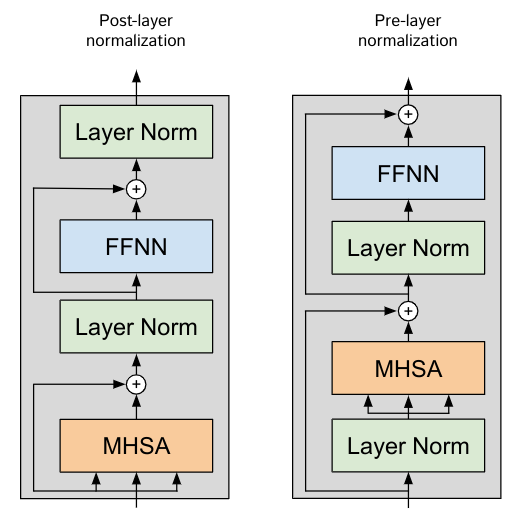

In [ ]:
class EncoderBlock(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.layer_norm_1 = nn.LayerNorm(config.hidden_size)
        self.layer_norm_2 = nn.LayerNorm(config.hidden_size)
        self.attention = MultiHeadAttention(config)
        self.feed_forward = FeedForward(config)
        self.to(config.device)

    def forward(self, x, mask=None):
        hidden_state = self.layer_norm_1(x)
        x = x + self.attention(hidden_state, mask=mask)
        x = x + self.feed_forward(self.layer_norm_2(x))
        return x

### Exercise

Build an instance of the `EncoderBlock` class, and test its `forward` method on the values contained in `input_embeds`. Check that the size of the result is consistent with the relevant parameters of our transformer.


### Exercise

Implement a variant of the `EncoderBlock` class that uses the layer normalization technique not used in the previous example.

**Note** Call the new class `PostNormEncoderBlock`, as we will use the latter in the next cells.

In [ ]:
def test_enc_block():
    torch.manual_seed(0)
    enc_block = PostNormEncoderBlock(config)
    embedding = Embeddings(config)
    att_head = AttentionHead(config.hidden_size,2,config)

    input_embeds = embedding(inputs.input_ids)
    # pass the output of the enconder block to a single attention head just
    # to have a manageable test
    res = att_head(enc_block(input_embeds))
    ground_truth = torch.tensor([[[ 0.1911,  0.0066],
                                  [ 0.1481,  0.1285],
                                  [ 0.1726,  0.0065],
                                  [ 0.1758,  0.0797],
                                  [ 0.1811, -0.0204],
                                  [ 0.1833, -0.0105],
                                  [ 0.1543,  0.0244],
                                  [ 0.1922, -0.0126],
                                  [ 0.1679,  0.0384]]], device=device)
    assert(torch.allclose(res, ground_truth, atol=1e-4, rtol=1e-4))
    print('It works!')

In [ ]:
test_enc_block()

It works!


### Exercise

The following cell contains a skeleton for the implementation of a possible `Encoder` class, corresponding to an encoder block. Fill in the blanks, replacing the `<FILL_ME>` occurrences.

**Note**

- You can use the `num_hidden_layers` field in the `config` argument to retrieve the number of encoder blocks.
- Be sure to properly insert an `Embedding` object in the implementation.
- Remeber to pass the argument corresponding to `mask` each time an encoder block is invoked.

In [ ]:
class Encoder(nn.Module):
    def __init__(self, config):
        super().__init__()
        <FILL_ME>
        self.to(config.device)

    def forward(self, x, mask=None):
        <FILL_ME>

In [ ]:
def test_encoder():
    torch.manual_seed(0)
    encoder = Encoder(config)
    att_head = AttentionHead(config.hidden_size,2,config)

    # pass the output of the enconder block to a single attention head just
    # to have a manageable test
    res = att_head(encoder(inputs.input_ids))
    ground_truth = torch.tensor([[[ 0.1520,  0.4280],
                                  [ 0.3220,  0.4294],
                                  [-0.3974,  0.6720],
                                  [-1.5217,  0.6097],
                                  [-0.5084,  0.3982],
                                  [-0.1488,  0.4140],
                                  [-0.4652,  0.5447],
                                  [-0.0397,  0.3900],
                                  [-0.4316,  0.6750]]], device=device)
    assert(torch.allclose(res, ground_truth, atol=1e-4, rtol=1e-4))
    print('It works!')

In [ ]:
test_encoder()

It works!


### Exercise

Build an instance of the `Encoder` class, and test its `forward` method on the values contained in `input.input_ids`. Save the results in a variable named `encoder_output` (we will need it later on, when we will test our decoder implementation). Check that the size of the result is consistent with the relevant parameters of our transformer. Why did we need to change the value used for testing purposes?


### Exercise

Here below you find the scheme of a decoder block shown during the lecture.

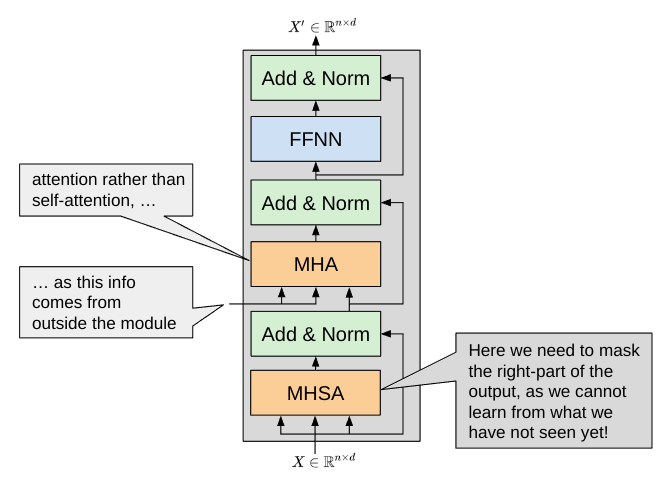

The following cell contains a skeleton for the implementation of a possible `EncoderDecoderAttention` class, corresponding to an encoder/decoder attention block. Fill in the blanks, replacing the `<FILL_ME>` occurrences.

In [ ]:
class EncoderDecoderAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        embed_dim = config.hidden_size
        self.q = <FILL_ME>
        self.to(device)

    def forward(self, hidden_state, encoder_final_state, mask=None):
        <FILL_ME>

In [ ]:
def test_encoderdecoder():
    torch.manual_seed(0)
    enc_dec = EncoderDecoderAttention(config)
    embedding = Embeddings(config)
    att_head = AttentionHead(config.hidden_size,2,config)

    input_embeds = embedding(inputs.input_ids)
    # pass the output of the enconder-decoder block to a single attention head
    # just to have a manageable test
    res = att_head(enc_dec(input_embeds,input_embeds))
    ground_truth = torch.tensor([[[-0.2965,  0.1938],
                                  [-0.2998,  0.2008],
                                  [-0.2987,  0.1950],
                                  [-0.3190,  0.2317],
                                  [-0.3046,  0.2055],
                                  [-0.3050,  0.2071],
                                  [-0.3013,  0.2022],
                                  [-0.2971,  0.1947],
                                  [-0.3053,  0.2075]]], device=device)
    assert(torch.allclose(res, ground_truth, atol=1e-4, rtol=1e-4))
    print('It works!')

In [ ]:
test_encoderdecoder()

It works!


### Exercise

Build an instance of the `Encoder` class, and test its `forward` method: explain why you will need to specify two arguments, and use for both the values contained in `input_embeds`. Check that the size of the result is consistent with the relevant parameters of our transformer.

### Exercise

The following cell contain two functions which allow us to dynamically create the masks used when training a transformer:

- the target mask (`trg_mask`) is the one used in the masked self-attention module
- the source mask (`src_mask`) deals with the fact that the inputs to encoders and decoders should have a fixed length, thus padding via a particular padding might be applied.

In [ ]:
from torch.autograd import Variable

def nopeak_mask(size, device):
    np_mask = np.triu(np.ones((1, size, size)), k=1).astype('uint8')
    np_mask = Variable(torch.from_numpy(np_mask == 0).to(device))
    return np_mask

def create_masks(src, trg, pad_tag, device):

    src_mask = (src != pad_tag).unsqueeze(-2).to(device)

    if trg is not None:
        trg_mask = (trg != pad_tag).unsqueeze(-2).to(device)
        size = trg.size(1)  # get seq_len for matrix
        np_mask = nopeak_mask(size, device).to(device)
        trg_mask = trg_mask & np_mask

    else:
        trg_mask = None
    return src_mask, trg_mask

Create and print the source and target mask using `inputs.input_ids` as values of the first two arguments to the `create_masks` function. Note that the ID of the special token used for padding is available as `tokenizer.pad_token_id`. Check that the obtained result is consistent with the size of the specified input. Note also that the source and target mask have different sizes: can you explain why this is not an issue?

### Exercise

Re-implement `scaled_dot_prod_attention` so that the function returns the computed attention scores when the optional argument `return_scores` is set to `True`, otherwise its behaviour remains unchanged. Create an instance of `AttentionHead`, use it to compute the query, key, and value matrices corresponding to `input_embeds` and use the latter to compute the attention scored. Show graphically these values using a heatmap.

**Note**

- The results returned by `scaled_dot_prod_attention` will likely live in the GPU, so that they will have to be transfered in the CPU (using the `to` method) and detached by gradient information used by the backpropagation algorithm during training (via the `detach` method).
- You can use matplotlib (specifically, the `plt.imshow` function) to produce the heatmap, though you are free to chose any viable alternative.

In [ ]:
def scaled_dot_prod_attention(query, key, value, mask=None, return_scores=False):
    <FILL_ME>

In [ ]:
def test_att_scores():
  torch.manual_seed(0)
  Q = torch.randint(-10,10,size=(4,1,3)).float()
  K = torch.randint(-10,10,size=(4,2,3)).float()
  V = torch.randint(-10,10,size=(4,2,1)).float()
  res = scaled_dot_prod_attention(Q,K,V,return_scores=True)
  res = torch.round(res)
  ground_truth = torch.tensor([[[1,0]],[[0,1]],[[1,0]],[[1,0]]])
  assert((res == ground_truth).all())
  print('It works!')

In [ ]:
test_att_scores()

It works!


### Exercise

Here below you find an implementation of a decoder block.

In [ ]:
class DecoderBlock(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.layer_norm_1 = nn.LayerNorm(config.hidden_size)
        self.layer_norm_2 = nn.LayerNorm(config.hidden_size)
        self.layer_norm_3 = nn.LayerNorm(config.hidden_size)
        self.masked_self_attention = MultiHeadAttention(config)
        self.encoder_decoder_attention = EncoderDecoderAttention(config)
        self.feed_forward = FeedForward(config)
        self.to(device)

    def forward(self, x, encoder_final_state, src_mask, tgt_mask):
        hidden_state = self.layer_norm_1(x)
        x = x + self.masked_self_attention(hidden_state, mask=tgt_mask)
        hidden_state = self.layer_norm_2(x)
        x = x + self.encoder_decoder_attention(hidden_state,
                                               encoder_final_state,
                                               mask=src_mask)
        x = x + self.feed_forward(self.layer_norm_3(x))
        return x

Create an instance of this class and test it using
- `input_embeds` for both inputs to the block,
- the previously created source and target masks.

### Exercise

Complete the implementation of the following `Decoder` class, corresponding to a decoder module. Test it using `input.input_ids` as input to the decoder, and `encoder_output` (check that you have set this variable in a previous exercise) as state coming from the encoder. Check that the size of the result is consistent.

In [ ]:
class Decoder(nn.Module):
    def __init__(self, config):
        <FILL_ME>
        self.to(config.device)

    def forward(self, x, encoder_final_state, src_mask, tgt_mask):
        <FILL_ME>

In [ ]:
def test_decoder():
    torch.manual_seed(0)
    decoder = Decoder(config)
    att_head = AttentionHead(config.hidden_size,2,config)

    # pass the output of the decoder block to a single attention head just
    # to have a manageable test
    res = att_head(decoder(inputs.input_ids, encoder_output, src_mask, tgt_mask))
    ground_truth = torch.tensor([[[ 0.3318, -1.1588],
                                  [ 0.8498, -1.4108],
                                  [ 0.7327, -1.3550],
                                  [ 0.3625, -1.1765],
                                  [ 0.5703, -1.2898],
                                  [ 0.7111, -1.3692],
                                  [ 1.1592, -1.6539],
                                  [ 0.4408, -1.2232],
                                  [ 0.3937, -1.1888]]], device=device)
    assert(torch.allclose(res, ground_truth, atol=1e-4, rtol=1e-4))
    print('It works!')

In [ ]:
test_decoder()

It works!


### Exercise

Complete the implementation of the following `Transformer` class, corresponding to a transformer. Test it using `input.input_ids` both as input to the encoder and the decoder. Check that the size of the result is consistent.

In [ ]:
class Transformer(nn.Module):
    def __init__(self, config):
        <FILL_ME>
        self.to(config.device)

    def forward(self, inputs, outputs, src_mask, tgt_mask):
        <FILL_ME>

In [ ]:
def test_transformer():
    torch.manual_seed(0)
    transformer = Transformer(config)
    att_head = AttentionHead(config.vocab_size,2,config)

    # pass the output of the transformer block to a single attention head just
    # to have a manageable test
    res = att_head(transformer(inputs.input_ids, inputs.input_ids, src_mask, tgt_mask))
    ground_truth = torch.tensor([[[-0.0026,  0.0016],
                                  [-0.0026,  0.0016],
                                  [-0.0026,  0.0016],
                                  [-0.0026,  0.0016],
                                  [-0.0026,  0.0016],
                                  [-0.0026,  0.0016],
                                  [-0.0026,  0.0016],
                                  [-0.0026,  0.0016],
                                  [-0.0026,  0.0016]]], device=device)
    assert(torch.allclose(res, ground_truth, atol=1e-4, rtol=1e-4))
    print('It works!')

In [ ]:
test_transformer()

It works!


### Exercise

The following cell contains a method that queries in an autoregressive way a transformer.

In [ ]:
def query_model(transformer, text, tokenizer, device, max_length=25):

    inputs = tokenizer(text, return_tensors='pt').to(device)
    output_string = ''
    outputs = tokenizer(output_string, return_tensors='pt').to(device)
    outputs = outputs.input_ids

    i = 0
    next_token_id = tokenizer.cls_token_id
    while i < max_length and next_token_id != tokenizer.eos_token_id:
        i += 1

        src_mask, tgt_mask = create_masks(inputs.input_ids, outputs,
                                          tokenizer.pad_token_id, device)

        probs = transformer(inputs.input_ids, outputs, src_mask, tgt_mask)
        next_token_id = probs[0][-1].argmax().unsqueeze(dim=0)
        outputs = torch.cat((outputs,next_token_id.unsqueeze(dim=0)),dim=1)
        next_token = tokenizer.convert_ids_to_tokens(next_token_id)
        output_string = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(outputs[0]))

    return output_string

Invoke this function on a text of your choice and on the instance of `Transformer` you just created.

**Note** Don't expect any meaningful text as a result: the transformer we are using has not been trained (yet).

### Exercise

The next two cells download a dataset for English/Spanish translation and define a `train_model` method that trains a transformer.

In [ ]:
from datasets import load_dataset

dataset = load_dataset("loresiensis/corpus-en-es")
dataset

Generating train split:   0%|          | 0/9439 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1049 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['EN', 'ES'],
        num_rows: 9439
    })
    test: Dataset({
        features: ['EN', 'ES'],
        num_rows: 1049
    })
})

In [ ]:
from transformers import get_cosine_schedule_with_warmup

def train_model(model, train, src_id, trg_id, tokenizer, epochs, optimizer, config, device):

    print("training model...")

    num_training_steps = epochs * len(train)
    num_warmup_steps = int(num_training_steps * 0.1)

    scheduler = get_cosine_schedule_with_warmup(optimizer,
                                                num_warmup_steps,
                                                num_training_steps,
                                                num_cycles= 0.5)

    model.train()
    start = time.time()

    for epoch in range(epochs):

        total_loss = 0
        printevery = 100

        print("\r   %dm: epoch %d [%s] %d%%  loss = %s" %\
        ((time.time() - start)//60, epoch + 1, "".join(' '*20), 0, '...'), end='')


        for i, batch in enumerate(train):
            src = tokenizer(batch[src_id][:config.max_length], return_tensors='pt').input_ids.to(config.device)
            trg = tokenizer(batch[trg_id][:config.max_length], return_tensors='pt').input_ids.to(config.device)

            trg_input = trg[:, :-1]
            src_mask, trg_mask = create_masks(src, trg_input, tokenizer.pad_token_id, device)
            src_mask.to(device)
            trg_mask.to(device)
            trg_input.to(device)
            preds = model(src, trg_input, src_mask, trg_mask)
            ys = trg[:, 1:].contiguous().view(-1)
            optimizer.zero_grad()
            loss = F.cross_entropy(preds.view(-1, preds.size(-1)), ys, ignore_index=tokenizer.pad_token_id)
            loss.backward()
            optimizer.step()
            scheduler.step()

            total_loss += loss.item()

            if (i + 1) % printevery == 0:
                 p = int(100 * (i + 1) / len(train))
                 avg_loss = total_loss/printevery

                 print("\r   %dm: epoch %d [%s%s] %d%% loss = %.3f" %\
                 ((time.time() - start)//60, epoch + 1, "".join('#'*(p//5)), "".join(' '*(20-(p//5))), p, avg_loss), end='')

                 total_loss = 0

        print("\r%dm: epoch %d [%s%s] %d%%  loss = %.3f\nepoch %d complete, loss = %.03f" %\
        ((time.time() - start)//60, epoch + 1, "".join('#'*(100//5)), "".join(' '*(20-(100//5))), 100, avg_loss, epoch + 1, avg_loss))


Run the following cell, which will train our previously created transformer for one epoch.

**Note** Training even for one epoch will require a lot of time, likely 20 minutes or so. In the meanwhile, you can focus on the last two exercises.

In [ ]:
torch.manual_seed(0)
transformer = Transformer(config)
optimizer = torch.optim.Adam(transformer.parameters(),
                             lr=1E-6, betas=(0.9, 0.98),
                             amsgrad=True, eps=1E-9,
                             weight_decay=2e-5)
train_model(transformer, dataset['train'], 'EN', 'ES', tokenizer, 1,
            optimizer, config, device)

training model...
26m: epoch 1 [####################] 100%  loss = 11.055
epoch 1 complete, loss = 11.055


### Exercise

Use the previously defined `query_model` function in order to translate a text of your choice.

**Note** Also in this case, don't expect any meaningful output, as a single epoch is by far insufficient to get to any appreciable result.

In [ ]:
torch.manual_seed(0)
transformer = Transformer(config)

### Exercise

Modify the `query_model` function so that each next token is chosen by sampling from the distribution of obtained softmax values, possibly considering only the top-k probabilities, for a fixed value of k (or, even better, by adding an optional parameter to the function).

### Exercise

Search on the Web a description of the «beam search» procedure for choosing the tokens to be added to the output when querying a transformer. Modify the `query_model` function accordingly.

**Note** This exercise is vaguely described on purpose. It represents a challenge!